*O código é um passo a passo para entender, limpar e preparar a base de dados para análises mais profundas, facilitando a visualização de padrões e tendências no mercado de trabalho em ciência de dados.*

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [3]:
df.isnull()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
# traduzindo o nome das colunas do arquivo de dados para o ptbr
renomear_colunas = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title' : 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'USD',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=renomear_colunas, inplace=True)
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,empresa,tamanho_empresa
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [ ]:
# sum -> soma os valores booleanos, no caso traz a soma dos valores nulos por coluna
# isnull -> verifica quais valores são nulos

df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
USD                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [7]:
# traz os valores únicos dentro de determinada coluna. Observação o valor 'nan' demonstra valores null
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [8]:
# fazendo um filtro na base e trazer apenas as com valores nulos
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,USD,residencia,remoto,empresa,tamanho_empresa
5588,NaN,SE,FT,Product Manager,184500,USD,184500,US,0,US,M
59692,NaN,MI,FT,Engineer,110000,USD,110000,DE,0,DE,M
59710,NaN,EN,FT,Data Scientist,208800,USD,208800,US,0,US,M
59759,NaN,SE,FT,Software Engineer,135000,USD,135000,US,0,US,M
59789,NaN,SE,FT,Engineer,112000,USD,112000,US,0,US,M
131000,NaN,SE,FT,Machine Learning Engineer,163800,USD,163800,US,0,US,M
131006,NaN,SE,FT,Data Analytics Manager,204500,USD,204500,US,0,US,M
133054,NaN,EN,FT,Data Scientist,40000,USD,40000,JP,100,MY,L
133281,NaN,MI,FT,Machine Learning Engineer,180000,PLN,46597,PL,100,PL,L
133317,NaN,MI,FT,Data Scientist,130000,USD,130000,US,50,US,L


*Formas de preenchimento de dados nulos*

* 1. Preenchimento com Valores Derivados (Imputation)
Para salario: Usar a mediana ou média do salário da mesma categoria, senioridade e país.

* 2. Remover Linhas com Dados Faltantes
Caso a quantidade de dados nulos seja muito pequena (como neste caso, apenas 5 linhas), você pode simplesmente removê-las.

* 3. Inferência e Preenchimento com Regras de Negócio
 Preencher com base em regras claras.
 
 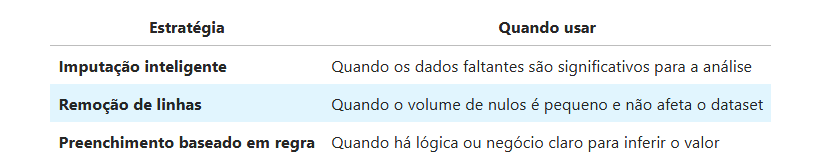

*Exemplos fictícios*

Exemplo de preenchimento com média e mediana em salários

In [9]:
import numpy as np

df_salarios = pd.DataFrame({
    'nome' : ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'salario' : [4000, np.nan, 5000, np.nan, 100000]
})

# média, substitui os valores nulos e arredonda os resultados
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# mediana, substitui os valores nulos
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


*Exemplos fictícios*

Exemplo de monitoramento de temperatura

In [10]:
df_temperaturas = pd.DataFrame({
    'dia' : ['segunda', 'terça', 'quarta', 'quinta', 'sexta', 'sabado', 'domingo'],
    'temperatura' : [30, np.nan, np.nan, 28, 27, np.nan, 26]
    
})

# ffill -> preenche os valores nulos com o valor anterior não nulo
df_temperaturas['preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

# bfill -> preenche os valores nulos com o próximo valor não nulo
df_temperaturas['preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_ffill,preenchido_bfill
0,segunda,30.0,30.0,30.0
1,terça,NaN,30.0,28.0
2,quarta,NaN,30.0,28.0
3,quinta,28.0,28.0,28.0
4,sexta,27.0,27.0,27.0
5,sabado,NaN,27.0,26.0
6,domingo,26.0,26.0,26.0


*Exemplos fictícios*

Exemplo de preenchimento com valor fixo

In [12]:
df_cidades = pd.DataFrame({
    'nome' : ['Ana', 'Bruno', 'Carlos', 'Daniele', 'Val'],
    'cidade' : ['São Paulo', 'Rio de Janeiro', np.nan, 'São Paulo', np.nan]
})

df_cidades['cidade_preenchida'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade,cidade_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,Rio de Janeiro,Rio de Janeiro
2,Carlos,NaN,Não informado
3,Daniele,São Paulo,São Paulo
4,Val,NaN,Não informado


*Tratando o dataframe base*

In [ ]:
# .dropna() -> remove as linhas que possuem valores nulos
df_limpo = df.dropna()

In [18]:
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
USD                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [19]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   USD              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  int64  
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 12.2+ MB


*Alterando o tipo de dados*

In [ ]:
# Converte a coluna 'ano' para o tipo de dados Int64 (inteiro de 64 bits)
# O método assign() cria uma nova coluna ou modifica uma existente no DataFrame
# info() exibe informações sobre o DataFrame, incluindo tipos de dados e valores não nulos

df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('Int64'))
df_limpo.info() df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('Int64'))

df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  Int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   USD              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  int64 
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: Int64(1), int64(3), object(7)
memory usage: 12.3+ MB


Palavra-chave: PRINT